# 🌊 Marées & Nuages
## Animation procédurale d’un monde imaginaire

Dans ce projet, nous allons animer notre carte générée par bruit cohérent.
L’objectif est de créer une transformation douce, presque respiratoire :

- marée montante et descendante  
- dérive des continents  
- nuages qui glissent  
- variations climatiques  

L’animation est produite en générant plusieurs frames, puis en les assemblant en GIF.


In [1]:
!pip install noise

import numpy as np
import matplotlib.pyplot as plt
from noise import pnoise2
from PIL import Image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp312-cp312-linux_x86_64.whl size=56633 sha256=610a1e96e8e2576ad559a41580886ed4c5d8e47810a1ee66d0a5c027778a3189
  Stored in directory: /root/.cache/pip/wheels/78/71/a2/47a0c6acdeb8f7a2f4e69067d3c737219e36414136441a1ef8
Successfully built noise


In [2]:
def generate_noise_frame(width, height, t, scale=100, octaves=4, persistence=0.5, lacunarity=2.0):
    """Génère une frame de bruit en ajoutant une dimension temporelle t."""
    img = np.zeros((height, width))

    for y in range(height):
        for x in range(width):
            nx = x / scale
            ny = y / scale
            img[y][x] = pnoise2(nx + t, ny + t,
                                octaves=octaves,
                                persistence=persistence,
                                lacunarity=lacunarity)

    img = (img - img.min()) / (img.max() - img.min())
    return img


In [3]:
from matplotlib.colors import ListedColormap

colors = [
    "#003f5c",  # mer profonde
    "#2f4b7c",  # mer claire
    "#f2e5bd",  # plage
    "#a1c349",  # savane
    "#2f7f31",  # forêt
    "#7d7d7d",  # montagne
    "#ffffff"   # neige
]

cmap_biomes = ListedColormap(colors)


In [4]:
def classify_biomes(noise):
    """Transforme une frame de bruit en biomes."""
    biome = np.zeros_like(noise)

    biome[noise < 0.30] = 0
    biome[(noise >= 0.30) & (noise < 0.40)] = 1
    biome[(noise >= 0.40) & (noise < 0.50)] = 2
    biome[(noise >= 0.50) & (noise < 0.65)] = 3
    biome[(noise >= 0.65) & (noise < 0.80)] = 4
    biome[(noise >= 0.80) & (noise < 0.90)] = 5
    biome[noise >= 0.90] = 6

    return biome


In [5]:
import io

width, height = 500, 500
n_frames = 40

frames = []

for i in range(n_frames):
    t = i * 0.05  # velocidade de l’animation
    noise = generate_noise_frame(width, height, t)
    biomes = classify_biomes(noise)

    # Captura da frame em memória
    buf = io.BytesIO()
    plt.figure(figsize=(6, 6))
    plt.imshow(biomes, cmap=cmap_biomes)
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(buf, format='png', dpi=80, bbox_inches="tight", pad_inches=0)
    plt.close()
    buf.seek(0) # Rewind the buffer to the beginning

    frames.append(Image.open(buf))

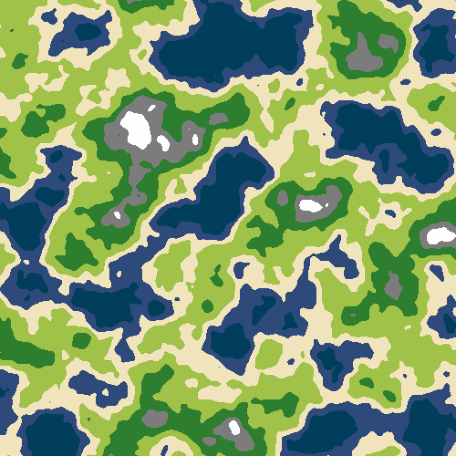

In [6]:
frames[0].save("atlas_vivant.gif",
               save_all=True,
               append_images=frames[1:],
               duration=120,
               loop=0)

from IPython.display import Image as IPImage
IPImage(filename="atlas_vivant.gif")
